# 8. Practice training a deep neural network on the CIFAR10 image dataset:

### a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

In [16]:
# Imports

from tensorflow import keras

In [17]:
# Creating a sequential model

## Clearing Keras backend
keras.backend.clear_session()

## Creating a sequential model object
model = keras.Sequential()

## Adding a layer that flattens the dimension
model.add(
  keras.layers.Flatten(
    input_shape=(32,32,3)
  )
)

## Adding 20 Dense layers with 100 nodes using a for loop
for i in range(0, 20):
  model.add(
    keras.layers.Dense(
      100, 
      activation='elu',
      kernel_initializer='he_normal'
    )
  )

## Adding an output layer
model.add(
  keras.layers.Dense(
    10,
    activation='softmax'
  )
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

### b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with *keras.datasets.cifar10.load_data()*. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

In [18]:
# Loading the CIFAR10 data

(training_X, training_y), (X_test, y_test) = keras.datasets.cifar10.load_data() 

In [19]:
# Viewing the shape of the training and test sets

print(f"Shape of training features: {training_X.shape}")
print(f"Shape of training target: {training_y.shape}")
print(f"Shape of test features: {X_test.shape}")
print(f"Shape of test target: {y_test.shape}")

Shape of training features: (50000, 32, 32, 3)
Shape of training target: (50000, 1)
Shape of test features: (10000, 32, 32, 3)
Shape of test target: (10000, 1)


In [20]:
# Scaling the features

training_X = training_X/255.
X_test = X_test/255.

In [21]:
# Processing the target variable

## Import
from tensorflow.keras.utils import to_categorical

## Dummifying the target variable
training_y = to_categorical(training_y)
y_test = to_categorical(y_test)

## Viewing the shape of the new target
print(f"Shape of test target: {y_test.shape}")
print(f"Shape of training target: {training_y.shape}")

Shape of test target: (10000, 10)
Shape of training target: (50000, 10)


In [22]:
# Splitting train sets further into train and validation sets

## Train set
X_train = training_X[:45000]
y_train = training_y[:45000]

## Validation set
X_val = training_X[45000:]
y_val = training_y[45000:]

In [23]:
# Compiling the model

## Optimizers
optimizer = keras.optimizers.Nadam(learning_rate=0.001)

model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy']  
)

In [24]:
# Fitting the model

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.fit(
  X_train,
  y_train,
  epochs=50,
  callbacks=[callback],
  validation_data=(X_val, y_val)
)

Epoch 1/50
1407/1407 [==============================] - 22s 13ms/step - loss: 2.0866 - accuracy: 0.2317 - val_loss: 2.0583 - val_accuracy: 0.2402
Epoch 2/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.8650 - accuracy: 0.3152 - val_loss: 1.8462 - val_accuracy: 0.3208
Epoch 3/50
1407/1407 [==============================] - 19s 13ms/step - loss: 1.7957 - accuracy: 0.3494 - val_loss: 2.2091 - val_accuracy: 0.2490
Epoch 4/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7434 - accuracy: 0.3711 - val_loss: 1.7598 - val_accuracy: 0.3752
Epoch 5/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7025 - accuracy: 0.3910 - val_loss: 1.6968 - val_accuracy: 0.3892
Epoch 6/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6698 - accuracy: 0.4042 - val_loss: 1.8498 - val_accuracy: 0.3678
Epoch 7/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6396 - accuracy: 0.4136 - val_loss: 1.7600 -

In [25]:
# Predicting on the test set

model_predictions = model.predict(X_test)
model_predictions[0]

array([0.030517  , 0.03003925, 0.07990684, 0.26049998, 0.06207043,
       0.24870089, 0.2160871 , 0.04242021, 0.01084487, 0.01891342],
      dtype=float32)

Text(0.5, 1.0, 'cat : cat')

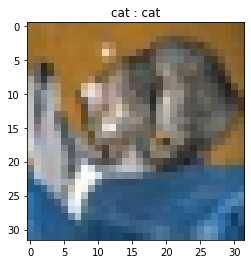

In [32]:
# Plotting images

import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(X_test[0])
plt.title(cifar_classes[keras.backend.argmax(y_test[0])]+" : "+cifar_classes[keras.backend.argmax(model_predictions[0])])


### c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [33]:
# Creating a sequential model

## Clearing Keras backend
keras.backend.clear_session()

## Creating a sequential model object
batch_model = keras.Sequential()

## Adding a layer that flattens the dimension
batch_model.add(
  keras.layers.Flatten(
    input_shape=(32,32,3)
  )
)

## Adding 20 Dense layers with 100 nodes using a for loop
for i in range(0, 20):
  
  ### Adding Dense layer without activation
  batch_model.add(
    keras.layers.Dense(
      100, 
      kernel_initializer='he_normal'
    )
  )

  ### Adding Batch Normalization
  batch_model.add(
    keras.layers.BatchNormalization()
  )

  ### Adding Activation layer
  batch_model.add(
      keras.layers.Activation('elu')
  )

## Adding an output layer
batch_model.add(
  keras.layers.Dense(
    10,
    activation='softmax'
  )
)

batch_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

In [34]:
# Compiling the model

## Optimizers
optimizer = keras.optimizers.Nadam(learning_rate=0.001)

batch_model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy']  
)

In [35]:
# Fitting the model

batch_model.fit(
  X_train,
  y_train,
  epochs=50,
  callbacks=[callback],
  validation_data=(X_val, y_val)
)

Epoch 1/50
1407/1407 [==============================] - 91s 18ms/step - loss: 1.8335 - accuracy: 0.3392 - val_loss: 1.8871 - val_accuracy: 0.3436
Epoch 2/50
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6775 - accuracy: 0.4021 - val_loss: 1.7343 - val_accuracy: 0.3788
Epoch 3/50
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6116 - accuracy: 0.4255 - val_loss: 1.5785 - val_accuracy: 0.4346
Epoch 4/50
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5610 - accuracy: 0.4456 - val_loss: 1.7002 - val_accuracy: 0.3968
Epoch 5/50
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5192 - accuracy: 0.4621 - val_loss: 1.5738 - val_accuracy: 0.4300
Epoch 6/50
1407/1407 [==============================] - 25s 18ms/step - loss: 1.4774 - accuracy: 0.4794 - val_loss: 1.5731 - val_accuracy: 0.4568
Epoch 7/50
1407/1407 [==============================] - 25s 18ms/step - loss: 1.4425 - accuracy: 0.4898 - val_loss: 1.5147 -

In [36]:
# Predicting on the test set

model_predictions = batch_model.predict(X_test)
model_predictions[0]

array([0.02146082, 0.07796101, 0.03982396, 0.4053529 , 0.29558486,
       0.07776496, 0.0035156 , 0.02354605, 0.04243474, 0.01255515],
      dtype=float32)

### d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [37]:
# Normalizing the data

def normalize_data(data1, data2):
  v_min = data1.min(axis=(0, 1), keepdims=True)
  v_max = data1.max(axis=(0, 1), keepdims=True)
  return (data2 - v_min)/(v_max - v_min)

X_train_norm = normalize_data(X_train, X_train)
X_val_norm = normalize_data(X_train, X_val)

In [41]:
# Creating a sequential model

## Clearing Keras backend
keras.backend.clear_session()

## Creating a sequential model object
selu_model = keras.Sequential()

## Adding a layer that flattens the dimension
selu_model.add(
  keras.layers.Flatten(
    input_shape=(32,32,3)
  )
)

## Adding 20 Dense layers with 100 nodes using a for loop
for i in range(0, 20):
  
  ### Adding Dense layer without activation
  selu_model.add(
    keras.layers.Dense(
      100, 
      kernel_initializer='lecun_normal',
      activation='selu'
    )
  )

## Adding an output layer
selu_model.add(
  keras.layers.Dense(
    10,
    activation='softmax'
  )
)

selu_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [42]:
# Compiling the model

## Optimizers
optimizer = keras.optimizers.Nadam(learning_rate=0.001)

selu_model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy']  
)

In [43]:
# Fitting the model

selu_model.fit(
  X_train_norm,
  y_train,
  epochs=50,
  callbacks=[callback],
  validation_data=(X_val_norm, y_val)
)

Epoch 1/50
1407/1407 [==============================] - 22s 13ms/step - loss: 2.1558 - accuracy: 0.1811 - val_loss: 2.0227 - val_accuracy: 0.2342
Epoch 2/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9690 - accuracy: 0.2534 - val_loss: 2.0178 - val_accuracy: 0.2534
Epoch 3/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9501 - accuracy: 0.2644 - val_loss: 2.1240 - val_accuracy: 0.1808
Epoch 4/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9624 - accuracy: 0.2476 - val_loss: 1.9339 - val_accuracy: 0.2634
Epoch 5/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8741 - accuracy: 0.2904 - val_loss: 1.8729 - val_accuracy: 0.2930
Epoch 6/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8679 - accuracy: 0.2902 - val_loss: 1.8502 - val_accuracy: 0.2872
Epoch 7/50
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8536 - accuracy: 0.2967 - val_loss: 1.8242 -

### 5. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [ ]:
# Creating a sequential model with Alpha Dropout

## Clearing Keras backend
keras.backend.clear_session()

## Creating a sequential model object
alpha_model = keras.Sequential()

## Adding a layer that flattens the dimension
alpha_model.add(
  keras.layers.Flatten(
    input_shape=(32,32,3)
  )
)

## Adding 20 Dense layers with 100 nodes using a for loop
for i in range(0, 20):
  
  ### Adding Dense layer without activation
  alpha_model.add(
    keras.layers.Dense(
      100, 
      kernel_initializer='lecun_normal',
      activation='selu'
    )
  )

  ### Adding AlphaDropout
  alpha_model.add(
    keras.layers.AlphaDropout(
      rate=0.3
    )
  )

## Adding an output layer
alpha_model.add(
  keras.layers.Dense(
    10,
    activation='softmax'
  )
)

alpha_model.summary()

In [ ]:
# Compiling the model

## Optimizers
optimizer = keras.optimizers.Nadam(learning_rate=0.001)

alpha_model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy']  
)

In [ ]:
# Fitting the model

alpha_model.fit(
  X_train_norm,
  y_train,
  epochs=50,
  callbacks=[callback],
  validation_data=(X_val_norm, y_val)
)

### 6. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [ ]:
# Retraining model using 